In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 200)

In [2]:
data = pd.read_csv('data/athletes.csv')

In [3]:
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


### Признаки
**id** - идентификатор спортсмена  
**name** - имя спортсмена  
**nationality** - национальность  
**sex** - пол  
**dob** - дата рождения  
**height** - рост  
**weight** - вес  
**sport** - вид спорта  
**gold** - количество золотых медалей  
**silver** - количество серебрянных медалей  
**bronze** - количество бронзовых медалей  

# Подготовка и анализ датасета 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


Данных по первичному осмотру не хватает по весу и росту атлета.  
Стоит также посмотреть на пропуски в виде "?"

есть еще один пропуск в признаке 'dob', но так как он относится к дате рождения, им можно пренебречь

In [5]:
for col in data.columns:
    if '?' in data[col]:
        print(col)
    else:
        print(f'Знак ? отсутствует в параметре {col}')

Знак ? отсутствует в параметре id
Знак ? отсутствует в параметре name
Знак ? отсутствует в параметре nationality
Знак ? отсутствует в параметре sex
Знак ? отсутствует в параметре dob
Знак ? отсутствует в параметре height
Знак ? отсутствует в параметре weight
Знак ? отсутствует в параметре sport
Знак ? отсутствует в параметре gold
Знак ? отсутствует в параметре silver
Знак ? отсутствует в параметре bronze


По итогу скрытых пропусков не обнаружено

### Просто удалим пропуски.  


In [6]:
data = data[~(data['height'].isna())]
data = data[~(data['weight'].isna())]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10858 non-null  int64  
 1   name         10858 non-null  object 
 2   nationality  10858 non-null  object 
 3   sex          10858 non-null  object 
 4   dob          10858 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10858 non-null  float64
 7   sport        10858 non-null  object 
 8   gold         10858 non-null  int64  
 9   silver       10858 non-null  int64  
 10  bronze       10858 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1017.9+ KB


In [8]:
data_for_analysis = pd.get_dummies(data[['height', 'weight', 'sport', 'gold', 'silver', 'bronze']], columns=['sport'])

In [9]:
data_for_analysis.head(3)

,height,weight,gold,silver,bronze,sport_aquatics,sport_archery,sport_athletics,sport_badminton,sport_basketball,sport_canoe,sport_cycling,sport_equestrian,sport_fencing,sport_football,sport_golf,sport_gymnastics,sport_handball,sport_hockey,sport_judo,sport_modern pentathlon,sport_rowing,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,1.72,64.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.68,56.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.98,79.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
data_for_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 11537
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   height                   10858 non-null  float64
 1   weight                   10858 non-null  float64
 2   gold                     10858 non-null  int64  
 3   silver                   10858 non-null  int64  
 4   bronze                   10858 non-null  int64  
 5   sport_aquatics           10858 non-null  uint8  
 6   sport_archery            10858 non-null  uint8  
 7   sport_athletics          10858 non-null  uint8  
 8   sport_badminton          10858 non-null  uint8  
 9   sport_basketball         10858 non-null  uint8  
 10  sport_canoe              10858 non-null  uint8  
 11  sport_cycling            10858 non-null  uint8  
 12  sport_equestrian         10858 non-null  uint8  
 13  sport_fencing            10858 non-null  uint8  
 14  sport_football        

Будем проводить логистический анализ спорт, параметры спортсмена / пол  
в качестве зависимой переменной будет пол спортсмена

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
le.fit(data.sex)

LabelEncoder()

In [13]:
y = pd.Series(data=le.transform(data.sex))

# Построение модели

In [14]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(data_for_analysis, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
model = LogisticRegression(max_iter=1000)

In [17]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [18]:
model.score(X_train, y_train)

0.8195947501726917

In [19]:
model.score(X_test, y_test)

0.8093922651933702

# Построение кривых

### ROC-кривая (библиотека sklearn)

In [20]:
from sklearn.metrics import roc_curve

In [21]:
predictions = model.predict_proba(X_test)

In [22]:
model.coef_, model.intercept_

(array([[ 9.96936249,  0.09105599, -0.44261757, -0.386477  , -0.32091355,
         -0.46242265,  0.0690871 ,  0.4668792 ,  0.21408753, -3.17739013,
          0.13481758,  0.85696192,  0.86881817, -0.32405613,  0.42119208,
         -0.06887845,  1.62387506, -1.90847762,  0.15058389,  0.49556771,
          0.17056517, -1.28256008, -0.53110645,  0.08580291,  0.54250153,
          0.83493941, -0.1871001 , -0.68711591,  0.77072916, -2.44263038,
          1.23414192,  1.1741579 ]]),
 array([-23.68276829]))

In [23]:
data_for_analysis.dot(model.coef_.T) + model.intercept_

,0
0,-0.241002
1,-2.159160
2,3.395958
3,1.658544
4,1.683715
...,...
11533,-1.584887
11534,-0.232364
11535,5.040309
11536,-1.398511


In [24]:
fpr, tpr, thres = roc_curve(y_test, predictions[:, 1])

## Самостоятельный расчет параметров для построения

### TPR, FPR

In [25]:
def params(test, answer, thres):
    """Расчет параметров"""
    tn = 0
    fp = 0
    tp = 0
    fn = 0
    
    for t, a in zip(test, answer):
        if t == 1 and a >= thres:
            tp += 1
        elif t == 1 and a <= thres:
            fn += 1
        elif t == 0 and a >= thres:
            fp += 1
        elif t == 0 and a <= thres:
            tn += 1
        
    return tn, tp, fp, fn

In [26]:
def gen(finish, start=0, step=.1):
    """Генератор значений"""
    while start < finish:
        yield start
        start += step

In [27]:
def fpr_tpr(test, answer, thres):
    fpr = []
    tpr = []
    
    for i in range(len(thres)):
        tn, tp, fp, fn = params(test, answer, thres[i])
        
        try:
            fpr.append(fp / (fp + tn))
        except:
            fpr.append(0)
        
        try:
            tpr.append(tp / (tp + fn))
        except:
            tpr.append(0)
    
    return fpr, tpr

### ROC-кривая

In [28]:
thres_ = [n for n in gen(start=0, finish=1, step=1/len(y_test))]

In [29]:
fpr_, tpr_ = fpr_tpr(y_test, predictions[:, 1], thres_)

### ROC-AUC (библиотека sklearn)

In [30]:
from sklearn.metrics import roc_auc_score

In [31]:
roc_auc_score(y_test, predictions[:, 1])

0.8886185705291396

### ROC-AUC

#### Уравнение для истино положительных результатов:
$$TPR(x) = 1 - x^2$$
    
#### Уравнение для ложно положительных результатов:
$$FPR(x) = (1 - x)^2$$

#### Расчет площади под кривой:
$$ \int\limits_{0}^{1} TPR(x)*FPR'(x)*dx = 2*\int\limits_{0}^{1} (1 - x^2)*(1 - x)dx$$
#### То есть: 
$$ TPR = 2*(\sqrt FPR) - FPR = \int\limits_{0}^{1} (2*\sqrt t - t)dt$$

In [32]:
from scipy import integrate

In [33]:
auc = integrate.quad(lambda x: 2 * np.sqrt(x) - x, 0, 1)

In [34]:
auc[0]

0.8333333333333335

Значения AUC рассчитанные вручную и используя библиотечные методы практически равны: чуть выше 0.8.  
Разница в значениях составила примерно 5.5%.  

### Precision — Recall

In [35]:
from sklearn.metrics import precision_recall_curve

In [36]:
def precision_recall(test, answer, thres):
    precision = []
    recall = []
    
    for i in range(len(thres)):
        tn, tp, fp, fn = params(test, answer, thres[i])
        
        try:
            precision.append(tp / (tp + fp))
        except:
            precision.append(0)
        
        try:
            recall.append(tp / (tp + fn))
        except:
            recall.append(0)
    
    return precision, recall

In [37]:
pr, rec, th = precision_recall_curve(y_test, predictions[:, 1])

In [38]:
precision, recall = precision_recall(y_test, predictions[:, 1], thres_)

# Заключение

В действительности, чем кривая ближе к виду, когда выпуклая часть стремится к оси **y** образуя прямой угол. 
При этом самый наихудший вариант - это когда кривая повторяет прямую линию, что в свою очередь означает, что результат получается случайным образом.  

Кривая может получиться ниже прямой, но это не означает, что модель плохая, надо просто поменять местами предсказания и кривая будет выше. 

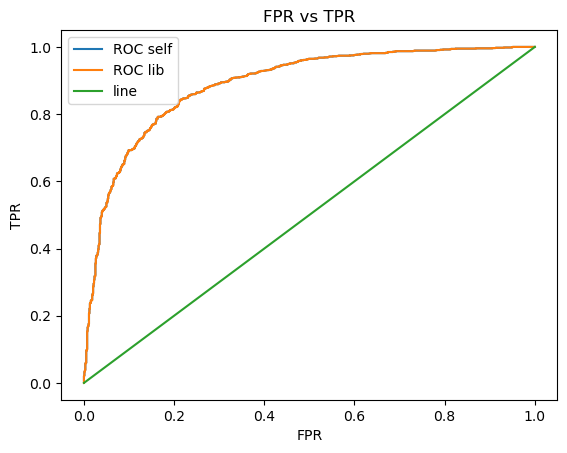

In [39]:
plt.plot(fpr_, tpr_, label='ROC self')
plt.plot(fpr, tpr, label='ROC lib')
plt.plot(np.linspace(0, 1), np.linspace(0, 1), label='line')

plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('FPR vs TPR')
plt.show()

Полученная ROC-кривая, рассчитанная самостоятельно, ложится идеально на кривую, рассчитанную через использование библиотечных методов. 

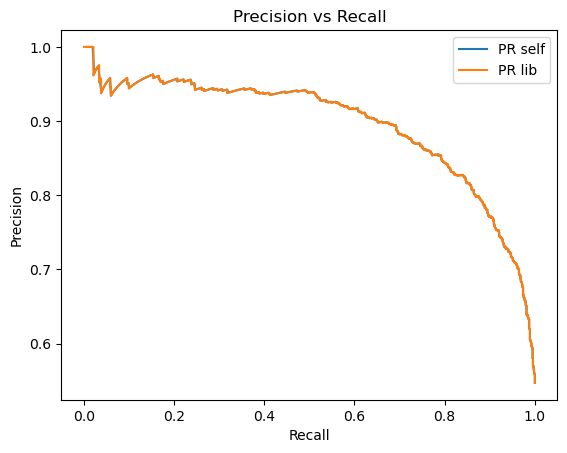

In [40]:
plt.plot(recall, precision, label='PR self')
plt.plot(rec, pr, label='PR lib')
plt.legend()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs Recall')
plt.show()

Аналогично и с PR-RE кривой